In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'violet',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }


In [4]:
data = pd.read_csv("../my_data/normalised_data.csv")

In [5]:
data.shape

(17647, 6)

In [8]:
data_array = data.to_numpy()
data_array[:2]

array([[ 1.7792121 ,  2.35737039,  0.59274913, -0.4780697 , -0.01300758,
        -0.0858113 ],
       [ 0.60416989,  1.70092027,  0.80424348, -0.28252517, -0.05669429,
        -0.0567765 ]])

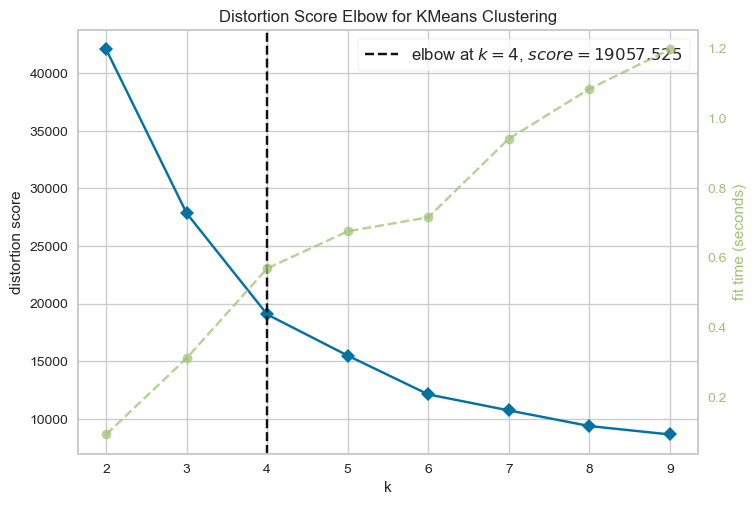

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
km = KMeans(random_state=25)
visualiser = KElbowVisualizer(km,k=(2,10),metric="distortion")
visualiser.fit(data)
visualiser.show()

In [11]:
k_data = {
    "k_value": visualiser.k_values_,
    "k_scores":visualiser.k_scores_
}
Elbow_values = pd.DataFrame(k_data)
Elbow_values

,k_value,k_scores
0,2,42068.451662
1,3,27838.878304
2,4,19057.525446
3,5,15486.336181
4,6,12119.582218
5,7,10729.941774
6,8,9372.615787
7,9,8640.171566


### **Bringing scaling, PCA and clustering together**

In [12]:
km = KMeans(n_clusters=4,random_state=25)
km.fit(data)
print(km.labels_,"\n")
print(km.cluster_centers_,"\n")

[3 1 3 ... 0 0 0] 

[[ 9.07721202e-01 -1.04475550e+00  4.49025108e-02 -1.27321266e-02
   2.27250605e-03 -3.13135606e-02]
 [-3.72313488e-01  1.29746246e+00 -1.05611384e-01  1.15848510e-01
   5.86661208e-03 -6.05336862e-02]
 [-2.94406456e+00  1.49062871e-01 -1.26279416e-02 -1.55414944e-02
  -3.01904229e-03  3.14456670e-02]
 [ 2.82732158e+00  4.73344750e-01  2.02470064e-02 -3.61565523e-02
  -3.09838666e-03  4.29691988e-02]] 



In [33]:
type(km)

sklearn.cluster._kmeans.KMeans

In [13]:
from collections import Counter
Counter(km.labels_)

Counter({3: 3992, 1: 2591, 0: 5779, 2: 5285})

In [16]:
# labels =km.predict(data)
# Counter(labels)
# # Counter({3: 3992, 1: 2591, 0: 5779, 2: 5285})

In [27]:
km.cluster_centers_

array([[ 9.07721202e-01, -1.04475550e+00,  4.49025108e-02,
        -1.27321266e-02,  2.27250605e-03, -3.13135606e-02],
       [-3.72313488e-01,  1.29746246e+00, -1.05611384e-01,
         1.15848510e-01,  5.86661208e-03, -6.05336862e-02],
       [-2.94406456e+00,  1.49062871e-01, -1.26279416e-02,
        -1.55414944e-02, -3.01904229e-03,  3.14456670e-02],
       [ 2.82732158e+00,  4.73344750e-01,  2.02470064e-02,
        -3.61565523e-02, -3.09838666e-03,  4.29691988e-02]])

Text(0, 0.5, 'Other Features')

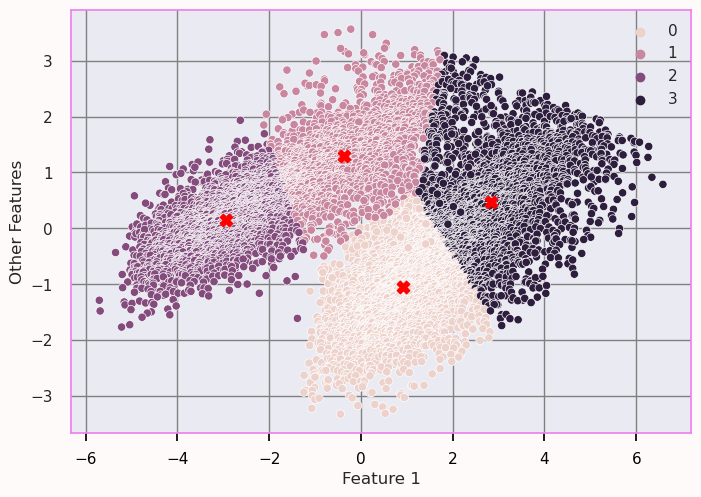

In [28]:
sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue=km.labels_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1]
,marker='X',s= 80, label="centriods",color='red')
plt.xlabel("Feature 1")
plt.ylabel("Other Features")

In [52]:
import sklearn
def cluster_plots(x:int,y:int, clusters):
    # improved version for pipleine
    sns.set_theme(rc=rc,style='darkgrid',palette='bright')
    # data points
    sns.scatterplot(x=data.iloc[:,x],y=data.iloc[:,y]
    ,hue=clusters.labels_,palette='bright')

    # centers
    sns.scatterplot(clusters.cluster_centers_[:,x]
    ,clusters.cluster_centers_[:,y]
    ,marker='X',s= 80, label="centriods",color='black')
    
    # styling
    plt.xlabel(f"Component {data.columns[x]}",fontdict=font_label)
    plt.ylabel(f"Component {data.columns[y]}",fontdict=font_label)
    plt.title("Cluster plots",fontdict=font_title)

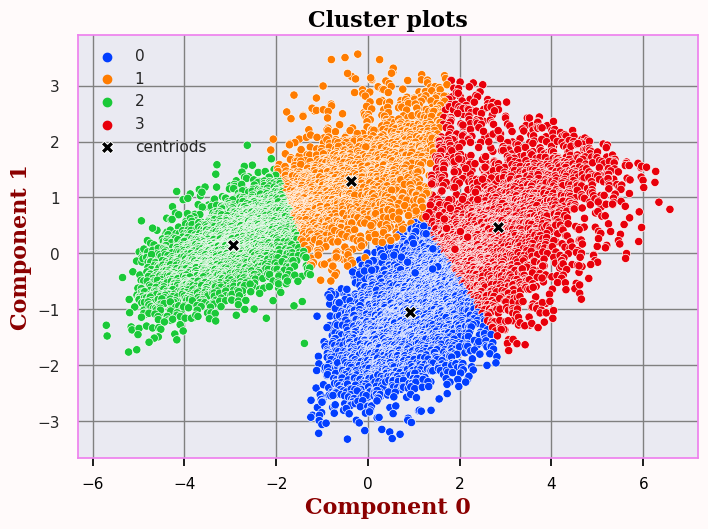

In [53]:
cluster_plots(0,1,km)

In [57]:
def threed_cluster_plots(x:int,y:int,z:int, clusters):
    fig = px.scatter_3d(data,
                        x=data.iloc[:,x],
                        y=data.iloc[:,y],
                        z=data.iloc[:,z],
                        opacity=1,
                        size_max=18,
                        symbol=clusters.labels_,
                        color=clusters.labels_) # color=km.labels_, symbol=km.labels_

    fig.update_layout(scene = dict(
                        xaxis_title=f"{data.columns[x]}",
                        yaxis_title=f"{data.columns[y]}",
                        zaxis_title=f"{data.columns[z]}"
                        ),
                        width=700,
                        margin=dict(r=20, b=10, l=10, t=10)
                        )

    # Hide colorbar axis
    fig.update_layout(coloraxis_showscale=False)
    # fig.update_traces(marker={'colorbar_xpad':0,
    #                         'showscale':False})

    fig.show()

In [58]:
threed_cluster_plots(0,1,2,km)

### **Combining clusters with scaled data**

In [59]:
data2 = pd.read_csv("my_data/outlier_treat.csv")
data2

,area,majoraxislength,minoraxislength,eccentricity,convexarea,equivdiameter,extent,perimeter,roundness,aspectration,class
0,6374,129.577,63.762,0.871,6476,90.087,0.662,314.656,0.809,2.032,jasmine
1,6946,136.304,65.738,0.876,7115,94.042,0.594,338.782,0.761,2.073,jasmine
2,5786,125.555,59.626,0.880,5945,85.831,0.623,307.304,0.770,2.106,jasmine
3,5896,127.014,59.843,0.882,6092,86.643,0.610,309.264,0.775,2.122,jasmine
4,6082,129.098,60.416,0.884,6204,87.999,0.661,308.106,0.805,2.137,jasmine
...,...,...,...,...,...,...,...,...,...,...,...
17642,5853,148.625,51.029,0.939,6008,86.327,0.499,332.960,0.663,2.913,gonen
17643,7585,169.594,58.142,0.939,7806,98.273,0.647,385.506,0.641,2.917,gonen
17644,6365,154.777,52.908,0.940,6531,90.023,0.561,342.253,0.683,2.925,gonen
17645,5960,151.398,51.475,0.940,6189,87.112,0.492,343.371,0.635,2.941,gonen


In [60]:
data2['clusters'] = km.labels_

In [61]:
data2.head()

,area,majoraxislength,minoraxislength,eccentricity,convexarea,equivdiameter,extent,perimeter,roundness,aspectration,class,clusters
0,6374,129.577,63.762,0.871,6476,90.087,0.662,314.656,0.809,2.032,jasmine,3
1,6946,136.304,65.738,0.876,7115,94.042,0.594,338.782,0.761,2.073,jasmine,1
2,5786,125.555,59.626,0.880,5945,85.831,0.623,307.304,0.770,2.106,jasmine,3
3,5896,127.014,59.843,0.882,6092,86.643,0.610,309.264,0.775,2.122,jasmine,3
4,6082,129.098,60.416,0.884,6204,87.999,0.661,308.106,0.805,2.137,jasmine,3


In [64]:
def condition_printer(data, condition):
    return data.loc[condition,:]

In [82]:
cond1 = (data2.area >= 8000)
my_cond = condition_printer(data2,cond1)
print(my_cond.value_counts().sum(),"\n")
# print(my_cond.loc[:,['class','clusters']].value_counts())

5689 



In [83]:
(
    my_cond.loc[:,['class','clusters']].
    value_counts().to_frame().sort_values(by=['class','clusters']).
    reset_index().rename(columns={0:"count"})
)

,class,clusters,count
0,gonen,1,429
1,gonen,2,5260


In [80]:
cond1 = (data2.area >= 5900) & (data2.area <= 8000)
my_cond = condition_printer(data2,cond1)
print(my_cond.value_counts().sum(),"\n")
# print(my_cond.loc[:,['class','clusters']].value_counts().to_frame())

8203 



In [84]:
frame1 = (
    my_cond.loc[:,['class','clusters']].
    value_counts().to_frame().sort_values(by=['class','clusters']).
    reset_index().rename(columns={0:"count"})
)
frame1

,class,clusters,count
0,gonen,1,429
1,gonen,2,5260


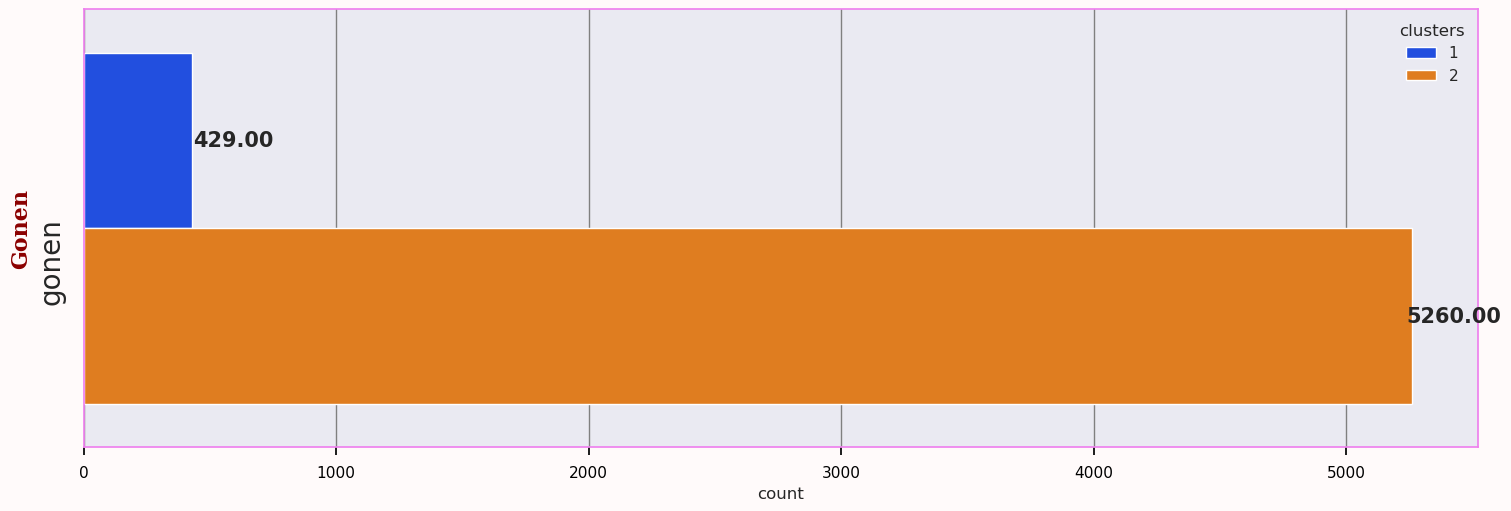

In [137]:
fig, ax = plt.subplots(1, figsize=(15,5), constrained_layout=True)
sns.barplot(
    data=frame1,
    y="class",
    x='count',
    hue='clusters',
    ax=ax  # Specify the axis for the barplot
)
plt.ylabel('Gonen',fontdict=font_label)
# Set y-tick labels font size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20,rotation=90)
for p in ax.patches:
    # Adjust the annotation coordinates for horizontal orientation
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(30, 0),  # Adjust the text offset
                textcoords='offset points', fontweight='bold', fontsize=15)


In [141]:
data2.to_csv("../my_data/clusters.csv",index=False)